In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv("../../data/stock_price/TSLA_y_01.csv")

In [3]:
data.head()

Unnamed: 0            Start_Datetime                End_Datetime  \
0           0  2016-05-23 13:30:00+00:00  2016-05-23 14:30:00+00:00   
1           1  2016-05-23 14:30:00+00:00  2016-05-23 15:30:00+00:00   
2           2  2016-05-23 15:30:00+00:00  2016-05-23 16:30:00+00:00   
3           3  2016-05-23 16:30:00+00:00  2016-05-23 17:30:00+00:00   
4           4  2016-05-23 17:30:00+00:00  2016-05-23 18:30:00+00:00   

   Trading_Hour    Open    High     Low   Close   Volume  Total_Daily_Volume  \
0             1  220.06  222.30  217.16  222.14  1770979             4837998   
1             2  221.92  222.60  219.26  219.49   678668             4837998   
2             3  219.51  219.53  217.66  218.47   601477             4837998   
3             4  218.57  219.04  217.41  217.49   439506             4837998   
4             5  217.44  217.60  216.19  217.49   514489             4837998   

   Percentage_Volume  
0           0.366056  
1           0.140279  
2           0.124324  
3           0.090845  
4           0.106343

In [4]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
data.head()

Start_Datetime                End_Datetime  Trading_Hour    Open  \
0  2016-05-23 13:30:00+00:00  2016-05-23 14:30:00+00:00             1  220.06   
1  2016-05-23 14:30:00+00:00  2016-05-23 15:30:00+00:00             2  221.92   
2  2016-05-23 15:30:00+00:00  2016-05-23 16:30:00+00:00             3  219.51   
3  2016-05-23 16:30:00+00:00  2016-05-23 17:30:00+00:00             4  218.57   
4  2016-05-23 17:30:00+00:00  2016-05-23 18:30:00+00:00             5  217.44   

     High     Low   Close   Volume  Total_Daily_Volume  Percentage_Volume  
0  222.30  217.16  222.14  1770979             4837998           0.366056  
1  222.60  219.26  219.49   678668             4837998           0.140279  
2  219.53  217.66  218.47   601477             4837998           0.124324  
3  219.04  217.41  217.49   439506             4837998           0.090845  
4  217.60  216.19  217.49   514489             4837998           0.106343

# calculate the rolling percentage_volume

In [29]:
rolling = data.groupby('Trading_Hour')['Percentage_Volume'].rolling(window=10).mean().rename('Rolling_perc_volume').reset_index()

In [30]:
rolling.head(20)

Trading_Hour  level_1  Rolling_perc_volume
0              1        0                  NaN
1              1        7                  NaN
2              1       14                  NaN
3              1       21                  NaN
4              1       28                  NaN
5              1       35                  NaN
6              1       42                  NaN
7              1       49                  NaN
8              1       56                  NaN
9              1       63             0.313791
10             1       70             0.302889
11             1       77             0.306097
12             1       84             0.300534
13             1       91             0.304439
14             1       98             0.305478
15             1      105             0.304515
16             1      112             0.295256
17             1      119             0.298425
18             1      126             0.286857
19             1      133             0.277729

In [31]:
rolling_new = rolling.set_index('level_1')

In [32]:
rolling_new.drop(['Trading_Hour'], axis = 1 , inplace = True)

In [33]:
data = data.merge(rolling_new, left_index=True, right_index=True, how='inner')

In [35]:
data.head()

Start_Datetime                End_Datetime  Trading_Hour    Open  \
0  2016-05-23 13:30:00+00:00  2016-05-23 14:30:00+00:00             1  220.06   
1  2016-05-23 14:30:00+00:00  2016-05-23 15:30:00+00:00             2  221.92   
2  2016-05-23 15:30:00+00:00  2016-05-23 16:30:00+00:00             3  219.51   
3  2016-05-23 16:30:00+00:00  2016-05-23 17:30:00+00:00             4  218.57   
4  2016-05-23 17:30:00+00:00  2016-05-23 18:30:00+00:00             5  217.44   

     High     Low   Close   Volume  Total_Daily_Volume  Percentage_Volume  \
0  222.30  217.16  222.14  1770979             4837998           0.366056   
1  222.60  219.26  219.49   678668             4837998           0.140279   
2  219.53  217.66  218.47   601477             4837998           0.124324   
3  219.04  217.41  217.49   439506             4837998           0.090845   
4  217.60  216.19  217.49   514489             4837998           0.106343   

   Rolling_volume  Rolling_perc_volume  
0             NaN                  NaN  
1             NaN                  NaN  
2             NaN                  NaN  
3             NaN                  NaN  
4             NaN                  NaN

In [50]:
data.rename(columns={'Start_Datetime ': 'Start_Datetime'}, inplace = True)

# calculate the rolling volume

In [19]:
roll_vol = data.groupby('Trading_Hour')['Volume'].rolling(window=10).mean().rename('Rolling_volume').reset_index()

In [20]:
roll_vol.head()

Trading_Hour  level_1  Rolling_volume
0             1        0             NaN
1             1        7             NaN
2             1       14             NaN
3             1       21             NaN
4             1       28             NaN

In [21]:
roll_vol = roll_vol.set_index('level_1')

In [22]:
roll_vol.drop(['Trading_Hour'], axis = 1 , inplace = True)

In [23]:
data = data.merge(roll_vol, left_index=True, right_index=True, how='inner')

In [28]:
data.head()

Start_Datetime                End_Datetime  Trading_Hour    Open  \
0  2016-05-23 13:30:00+00:00  2016-05-23 14:30:00+00:00             1  220.06   
1  2016-05-23 14:30:00+00:00  2016-05-23 15:30:00+00:00             2  221.92   
2  2016-05-23 15:30:00+00:00  2016-05-23 16:30:00+00:00             3  219.51   
3  2016-05-23 16:30:00+00:00  2016-05-23 17:30:00+00:00             4  218.57   
4  2016-05-23 17:30:00+00:00  2016-05-23 18:30:00+00:00             5  217.44   

     High     Low   Close   Volume  Total_Daily_Volume  Percentage_Volume  \
0  222.30  217.16  222.14  1770979             4837998           0.366056   
1  222.60  219.26  219.49   678668             4837998           0.140279   
2  219.53  217.66  218.47   601477             4837998           0.124324   
3  219.04  217.41  217.49   439506             4837998           0.090845   
4  217.60  216.19  217.49   514489             4837998           0.106343   

   Rolling_perc_volumn  Rolling_volume  
0                  NaN             NaN  
1                  NaN             NaN  
2                  NaN             NaN  
3                  NaN             NaN  
4                  NaN             NaN

In [36]:
data['Res_Perc_vol'] = data['Percentage_Volume'] - data['Rolling_perc_volume']

In [37]:
data['Res_vol'] = data['Volume'] - data['Rolling_volume']

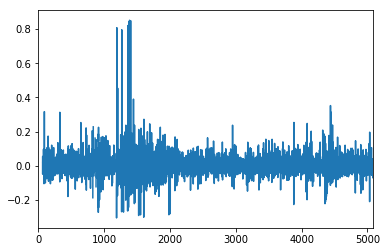

In [42]:
data['Res_Perc_vol'].plot()

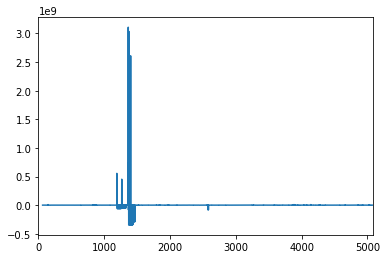

In [43]:
data['Res_vol'].plot()

In [45]:
data.tail()

Start_Datetime                End_Datetime  Trading_Hour  \
5084  2019-04-16 15:30:00+00:00  2019-04-16 16:30:00+00:00             3   
5085  2019-04-16 16:30:00+00:00  2019-04-16 17:30:00+00:00             4   
5086  2019-04-16 17:30:00+00:00  2019-04-16 18:30:00+00:00             5   
5087  2019-04-16 18:30:00+00:00  2019-04-16 19:30:00+00:00             6   
5088  2019-04-16 19:30:00+00:00  2019-04-16 20:00:00+00:00             7   

        Open    High     Low   Close  Volume  Total_Daily_Volume  \
5084  271.16  273.70  271.06  272.47  999939             7073734   
5085  272.55  274.74  271.81  273.90  866762             7073734   
5086  273.91  274.97  273.21  274.79  750558             7073734   
5087  274.75  275.00  271.81  272.26  675595             7073734   
5088  272.27  273.67  271.66  273.31  707819             7073734   

      Percentage_Volume  Rolling_volume  Rolling_perc_volume  Res_Perc_vol  \
5084           0.141359       1197375.1             0.122062      0.019297   
5085           0.122532        827021.5             0.089122      0.033411   
5086           0.106105        811595.8             0.082804      0.023301   
5087           0.095508        911135.2             0.088234      0.007273   
5088           0.100063        894736.3             0.094452      0.005611   

       Res_vol  
5084 -197436.1  
5085   39740.5  
5086  -61037.8  
5087 -235540.2  
5088 -186917.3

In [ ]:
data.to_csv("../../data/stock_price/TSLA_y_02.csv",  index = False)

In [51]:
# save the pickle file
with open('../../data/features/2019_04_30_TSLA_y_02_yishuang.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# read the pickle file
import pickle
file = open("../../data/features/2019_04_21_TSLA_y_02_yishuang.pickle",'rb')
object_file = pickle.load(file,encoding='utf-8')

In [ ]:
object_file

# check the pattern

In [3]:
data = pd.read_csv("../../data/stock_price/TSLA_y_01.csv")
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.groupby('Trading_Hour')['Trading_Hour'].count()

Trading_Hour
1    476
2    730
3    730
4    727
5    726
6    726
7    724
8    250
Name: Trading_Hour, dtype: int64

In [4]:
data.columns

Index(['Start_Datetime ', 'End_Datetime', 'Trading_Hour', 'Open', 'High',
       'Low', 'Close', 'Volume', 'Total_Daily_Volume', 'Percentage_Volume'],
      dtype='object')

In [5]:
data.rename(columns={'Start_Datetime ': 'Start_Datetime'}, inplace = True)

In [6]:
data['Datetime'] = data['Start_Datetime'].str[:19]

In [7]:
data['Date'] = data['Start_Datetime'].str[:10]

In [8]:
date_range = data['Date'].unique()

In [9]:
date_range[0:10]

array(['2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26',
       '2016-05-27', '2016-05-31', '2016-06-01', '2016-06-02',
       '2016-06-03', '2016-06-06'], dtype=object)

In [11]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [12]:
import matplotlib.dates as mdates
%matplotlib inline

In [13]:
data.head()

Start_Datetime               End_Datetime  Trading_Hour    Open  \
0  2016-05-23 13:30:00+00:00  2016-05-23 14:30:00+00:00             1  220.06   
1  2016-05-23 14:30:00+00:00  2016-05-23 15:30:00+00:00             2  221.92   
2  2016-05-23 15:30:00+00:00  2016-05-23 16:30:00+00:00             3  219.51   
3  2016-05-23 16:30:00+00:00  2016-05-23 17:30:00+00:00             4  218.57   
4  2016-05-23 17:30:00+00:00  2016-05-23 18:30:00+00:00             5  217.44   

     High     Low   Close   Volume  Total_Daily_Volume  Percentage_Volume  \
0  222.30  217.16  222.14  1770979             4837998           0.366056   
1  222.60  219.26  219.49   678668             4837998           0.140279   
2  219.53  217.66  218.47   601477             4837998           0.124324   
3  219.04  217.41  217.49   439506             4837998           0.090845   
4  217.60  216.19  217.49   514489             4837998           0.106343   

             Datetime        Date  
0 2016-05-23 13:30:00  2016-05-23  
1 2016-05-23 14:30:00  2016-05-23  
2 2016-05-23 15:30:00  2016-05-23  
3 2016-05-23 16:30:00  2016-05-23  
4 2016-05-23 17:30:00  2016-05-23

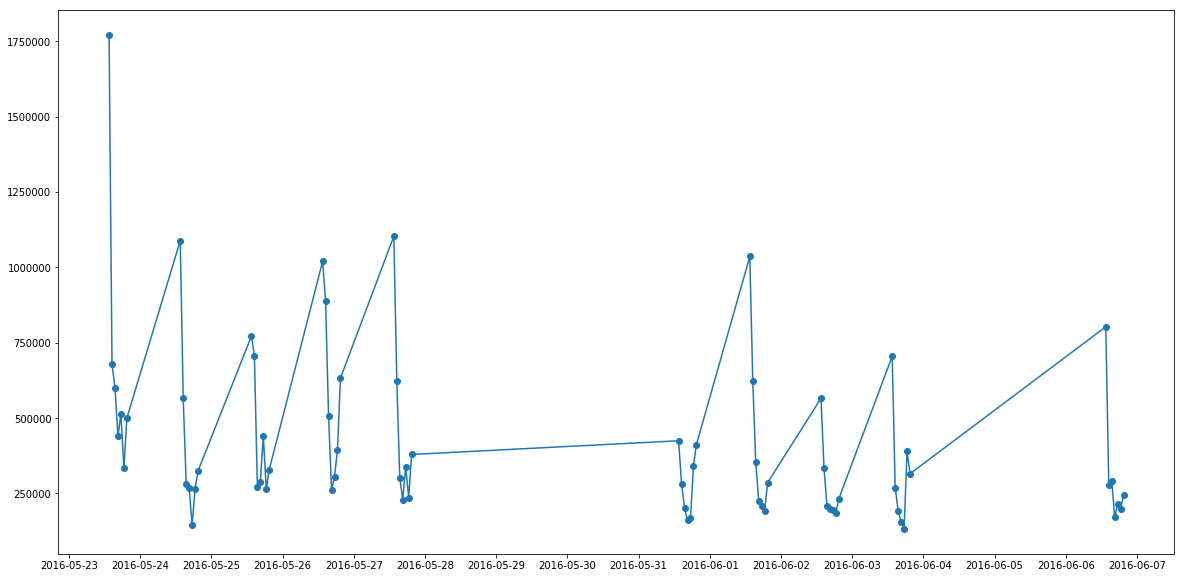

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
i = 0
start_idx = data.index[data['Date'] == date_range[i]][0]
end_idx = data.index[data['Date'] == date_range[i+10]][0]
sub_data = data.iloc[start_idx:end_idx]
x = sub_data["Datetime"]
y = sub_data["Volume"]
ax.plot(x, y, marker = 'o')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 


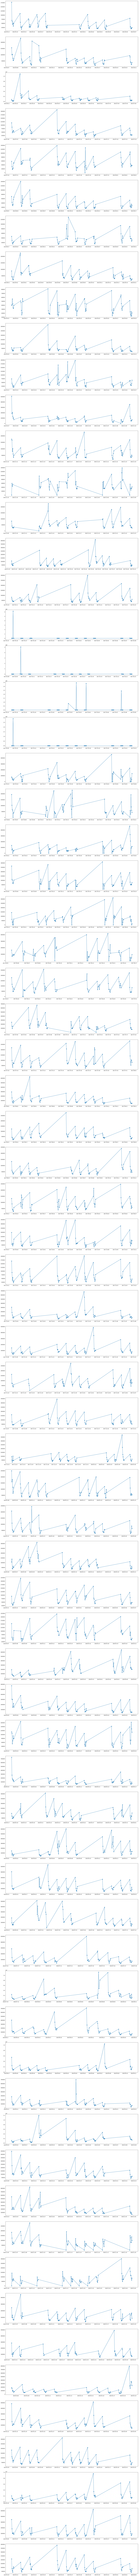

In [51]:
fig, ax = plt.subplots(nrows= int(date_range.shape[0]/10)-1, ncols=1, figsize=(25,500))
plot_idx = 0
i = 0
while i < (date_range.shape[0] - 10):
    start_idx = data.index[data['Date'] == date_range[i]][0]
    end_idx = data.index[data['Date'] == date_range[i+10]][0]
    sub_data = data.iloc[start_idx: end_idx]
    
    # plot
    x = sub_data["Datetime"]
    y = sub_data["Volume"]
    
    ax[plot_idx].plot(x, y, marker = 'o')
    ax[plot_idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax[plot_idx].xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    i += 10
    plot_idx += 1
    
#plt.tight_layout(pad=0.4, h_pad=5.0)    
plt.show()